In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [2]:
reviews = pd.read_csv("/kaggle/input/amazon-fine-food-reviews/Reviews.csv")
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
reviews.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


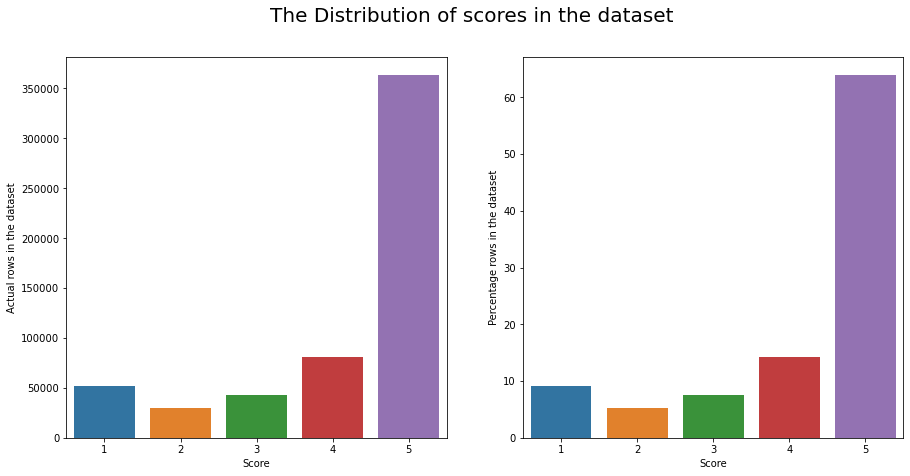

In [7]:
fig, axs = plt.subplots(1,2, figsize = (15,7))

fig.suptitle("The Distribution of scores in the dataset", size=20)

sns.countplot(data=reviews, x='Score', ax=axs[0])
sns.barplot(x="Score", y="Score", data=reviews, estimator=lambda x: len(x) / len(reviews) * 100)

axs[0].set_ylabel('Actual rows in the dataset')
axs[1].set_ylabel('Percentage rows in the dataset')
plt.show()

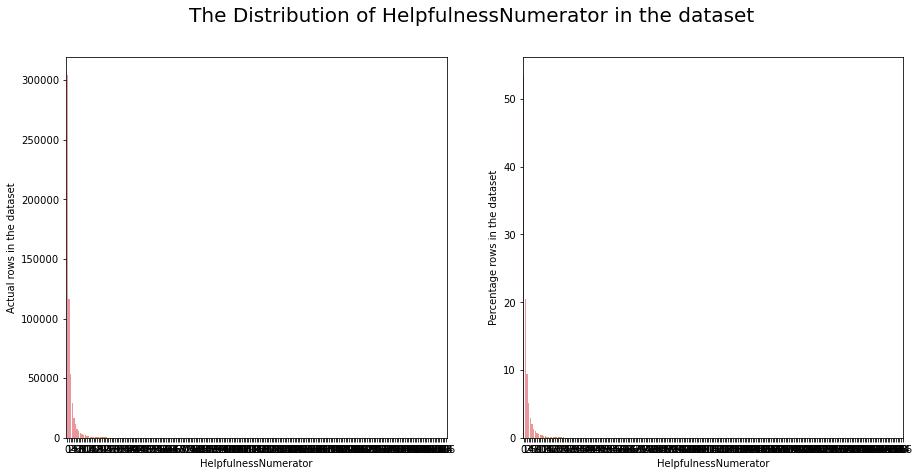

In [8]:
## Plots to see understand the columns Score

fig, axs = plt.subplots(1,2, figsize = (15,7))

fig.suptitle("The Distribution of HelpfulnessNumerator in the dataset", size=20)

sns.countplot(data=reviews, x='HelpfulnessNumerator', ax=axs[0])
sns.barplot(x="HelpfulnessNumerator", y="HelpfulnessNumerator", data=reviews, estimator=lambda x: len(x) / len(reviews) * 100)

axs[0].set_ylabel('Actual rows in the dataset')
axs[1].set_ylabel('Percentage rows in the dataset')
plt.show()

Not much information can be obtained from this plot, so we'll choose a different type of plot to understand this feature.

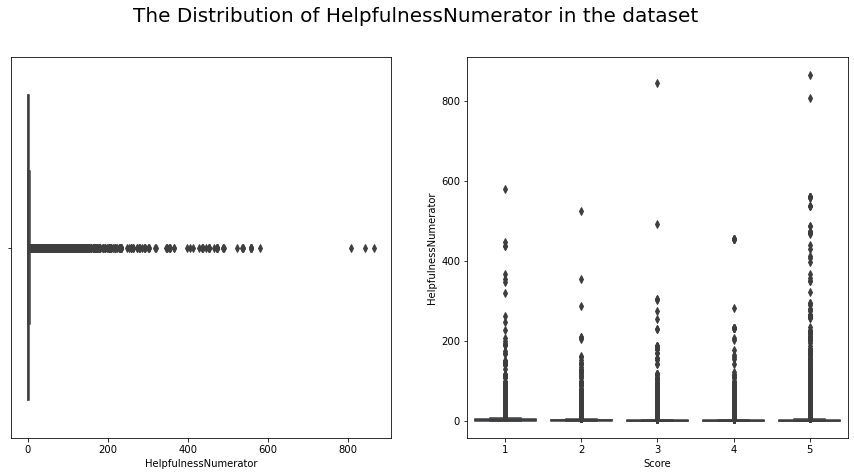

In [9]:
fig, axs = plt.subplots(1,2, figsize = (15,7))

fig.suptitle("The Distribution of HelpfulnessNumerator in the dataset", size=20)

sns.boxplot(data=reviews, x='HelpfulnessNumerator', ax=axs[0])
sns.boxplot(x="Score", y="HelpfulnessNumerator", data=reviews)

plt.show()

Again, this is something that does not help us at all. The data has a lot of outliers which are making it difficult to view the distribution of the data.

In [11]:
reviews["HelpfulnessNumerator"].describe()

count    568454.000000
mean          1.743817
std           7.636513
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         866.000000
Name: HelpfulnessNumerator, dtype: float64

In [12]:
reviews["HelpfulnessDenominator"].describe()

count    568454.00000
mean          2.22881
std           8.28974
min           0.00000
25%           0.00000
50%           1.00000
75%           2.00000
max         923.00000
Name: HelpfulnessDenominator, dtype: float64

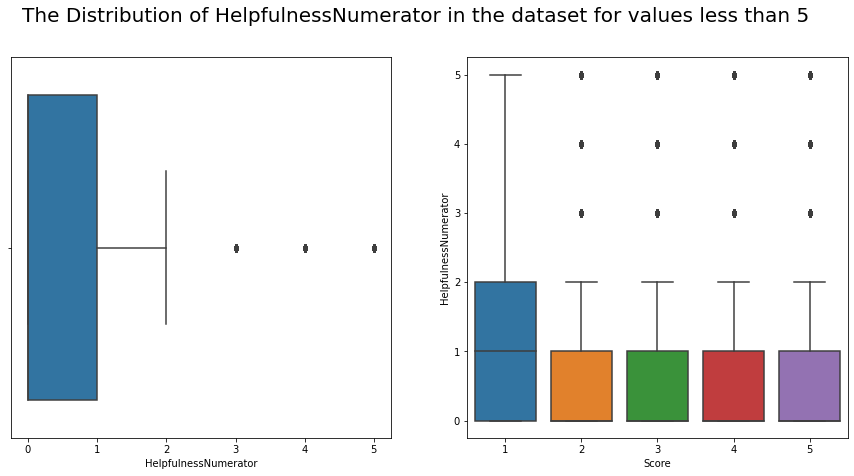

In [13]:
fig, axs = plt.subplots(1,2, figsize = (15,7))

max_threshold = 5
fig.suptitle(f"The Distribution of HelpfulnessNumerator in the dataset for values less than {max_threshold}", size=20)

sns.boxplot(data=reviews[reviews["HelpfulnessNumerator"] <= max_threshold], x='HelpfulnessNumerator', ax=axs[0])
sns.boxplot(x="Score", y="HelpfulnessNumerator", data=reviews[reviews["HelpfulnessNumerator"] <= max_threshold])

plt.show()

In [ ]:
sns.set_style("whitegrid")
fig, axs = plt.subplots(1,2, figsize = (15,7), sharey=True)

max_threshold = 3

plt.suptitle(f"Distribution for values less than {max_threshold}", size=18)

sns.countplot(data=reviews[reviews["HelpfulnessNumerator"] <= max_threshold], x='HelpfulnessNumerator', ax=axs[0])
sns.countplot(data=reviews[reviews["HelpfulnessDenominator"] <= max_threshold], x='HelpfulnessDenominator', ax=axs[1])

plt.show()